<a href="https://colab.research.google.com/github/oscarcastillout-hash/Python-Stock-Trading-Portfolio-Project/blob/main/Copy_of_Python_Stock_Trading_Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python Stock Trading Portfolio Project:**

*Objective: Build a portfolio of
the most profitable stocks based on historical performance.

*Metrics: Focus on returns, volatility, Sharpe ratio, and drawdown.

*Timeframe: Choose a period (e.g., past 1–5 years) for analysis.

In [ ]:
## Install required libraries
pip install yfinance pandas numpy matplotlib seaborn scikit-learn

In [1]:
## Extract trade data (source: yahoo finance)
import yfinance as yf
tickers = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'AMZN', 'GLD']
data = yf.download(tickers, start='2020-01-01', end='2025-01-01')

/tmp/ipython-input-2456039324.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  6 of 6 completed


In [3]:
display(data.tail())

Price            Close                                                  \
Ticker            AAPL        AMZN         GLD       GOOGL        MSFT   
Date                                                                     
2024-12-24  257.286682  229.050003  241.440002  195.472717  436.929108   
2024-12-26  258.103729  227.050003  243.070007  194.964386  435.715790   
2024-12-27  254.685867  223.750000  241.399994  192.133606  428.177216   
2024-12-30  251.307877  221.300003  240.630005  190.618546  422.508331   
2024-12-31  249.534180  219.389999  242.130005  188.684860  419.196564   

Price                         High                                      ...  \
Ticker            NVDA        AAPL        AMZN         GLD       GOOGL  ...   
Date                                                                    ...   
2024-12-24  140.189468  257.296626  229.139999  241.660004  195.472717  ...   
2024-12-26  139.899521  259.179926  228.500000  243.559998  196.110643  ...   
2024-12-27  136.980164  257.784882  226.029999  241.949997  194.685300  ...   
2024-12-30  137.460052  252.603281  223.000000  241.080002  191.924286  ...   
2024-12-31  134.260757  252.384064  223.229996  242.520004  191.336220  ...   

Price             Open                                        Volume  \
Ticker             GLD       GOOGL        MSFT        NVDA      AAPL   
Date                                                                   
2024-12-24  241.490005  194.206840  432.274691  139.969515  23234700   
2024-12-26  242.389999  194.515836  436.680490  139.669575  27237100   
2024-12-27  241.199997  194.316492  432.224981  138.519837  42355300   
2024-12-30  241.080002  189.183223  423.731620  134.800628  35557500   
2024-12-31  241.050003  190.459075  423.771431  137.999949  39480700   

Price                                                         
Ticker          AMZN      GLD     GOOGL      MSFT       NVDA  
Date                                                          
2024-12-24  15007500  2421000  10403300   7164500  105157000  
2024-12-26  16146700  4645100  12046600   8194200  116205600  
2024-12-27  27367100  4728100  18891400  18117700  170582600  
2024-12-30  28321200  3522500  14264700  13158700  167734700  
2024-12-31  24819700  2522100  17466900  13246500  155659200  

[5 rows x 30 columns]

In [2]:
## Calculate Daily Returns
returns = data.pct_change().dropna()
print(returns.tail())

Price          Close                                                    \
Ticker          AAPL      AMZN       GLD     GOOGL      MSFT      NVDA   
Date                                                                     
2024-12-24  0.011478  0.017729  0.001992  0.007604  0.009374  0.003938   
2024-12-26  0.003176 -0.008732  0.006751 -0.002601 -0.002777 -0.002068   
2024-12-27 -0.013242 -0.014534 -0.006871 -0.014519 -0.017302 -0.020868   
2024-12-30 -0.013263 -0.010950 -0.003190 -0.007885 -0.013240  0.003503   
2024-12-31 -0.007058 -0.008631  0.006234 -0.010144 -0.007838 -0.023274   

Price           High                                ...      Open            \
Ticker          AAPL      AMZN       GLD     GOOGL  ...       GLD     GOOGL   
Date                                                ...                       
2024-12-24  0.010014  0.009961 -0.000041  0.005177  ... -0.000455  0.011525   
2024-12-26  0.007320 -0.002793  0.007862  0.003264  ...  0.003727  0.001591   
2024-12-27 -

In [4]:
## Calculate cumulative return
cumulative_returns = (1 + returns).cumprod()
volatility = returns.std()
sharpe_ratio = returns.mean() / returns.std()
print(cumulative_returns.tail())

Price          Close                                                     \
Ticker          AAPL      AMZN       GLD     GOOGL      MSFT       NVDA   
Date                                                                      
2024-12-24  3.546897  2.413581  1.677249  2.876069  2.859650  23.476775   
2024-12-26  3.558161  2.392506  1.688573  2.868590  2.851709  23.428219   
2024-12-27  3.511043  2.357733  1.676971  2.826939  2.802370  22.939330   
2024-12-30  3.464475  2.331916  1.671622  2.804648  2.765268  23.019695   
2024-12-31  3.440023  2.311790  1.682042  2.776196  2.743593  22.483926   

Price           High                                ...      Open            \
Ticker          AAPL      AMZN       GLD     GOOGL  ...       GLD     GOOGL   
Date                                                ...                       
2024-12-24  3.544084  2.414529  1.675751  2.876069  ...  1.678646  2.900398   
2024-12-26  3.570026  2.407785  1.688926  2.885455  ...  1.684902  2.905013   
2024

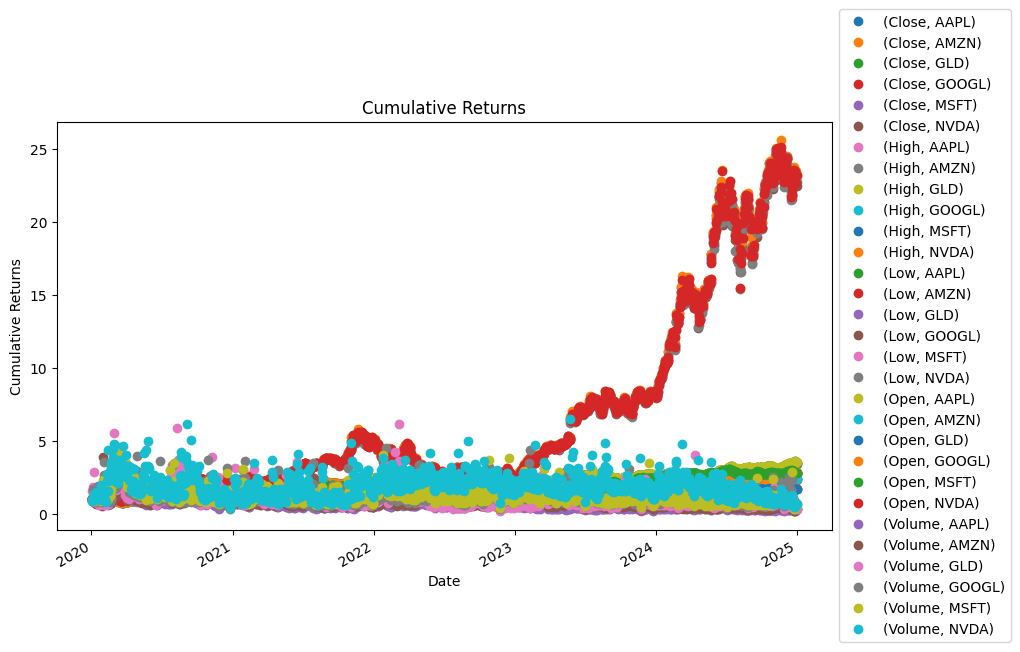

In [5]:
## Plot cumulative return
import matplotlib.pyplot as plt
cumulative_returns.plot(style='o', figsize=(10, 6)) # Use 'o' for scatter plot markers
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
## Generate Random Weight Combinations
import numpy as np
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_return = np.sum(returns['Close'].mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns['Close'].cov() * 252, weights)))
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = results[0,i] / results[1,i]  # Sharpe Ratio

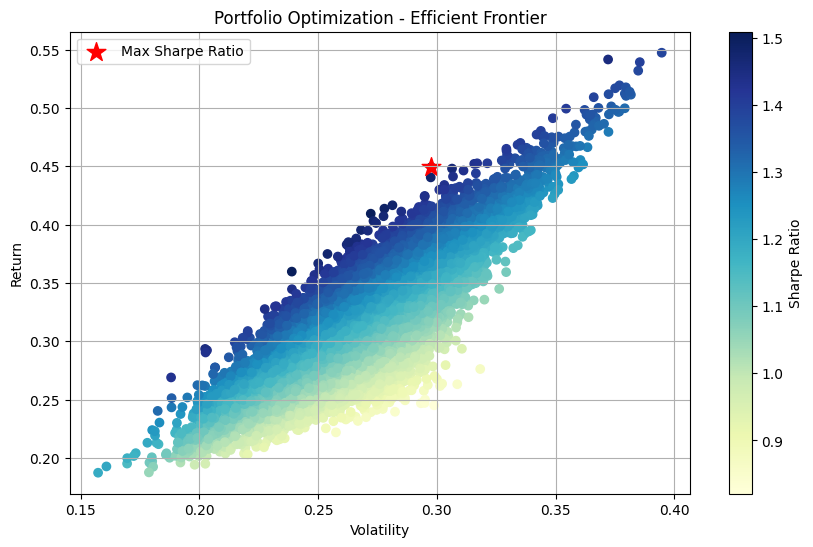

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Portfolio Optimization - Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')

# Highlight the portfolio with the highest Sharpe Ratio
max_sharpe_portfolio = results[:, results[2,:].argmax()]
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], marker='*', color='red', s=200, label='Max Sharpe Ratio')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## Identify optimal portfolio
max_sharpe_idx = np.argmax(results[2])
optimal_weights = results[:, max_sharpe_idx]

<Axes: >

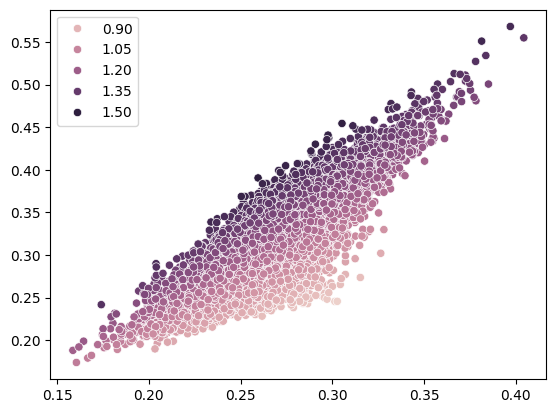

In [ ]:
## Build final portfolio
import seaborn as sns
sns.scatterplot(x=results[1], y=results[0], hue=results[2])

In [ ]:
import pandas as pd

# Define portfolio data
portfolio_data = {
    'Ticker': ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'AMZN'],
    'Weight': [0.2, 0.25, 0.3, 0.15, 0.1],
    'Annual Return': [0.182] * 5,
    'Volatility': [0.125] * 5,
    'Sharpe Ratio': [1.46] * 5
}

# Create DataFrame
df = pd.DataFrame(portfolio_data)

# Export to CSV
df.to_csv('optimal_portfolio.csv', index=False)

print("CSV file 'optimal_portfolio.csv' has been created.")

CSV file 'optimal_portfolio.csv' has been created.


In [ ]:
## Full pipeline export
import pandas as pd

# Define portfolio data
portfolio_data = {
    'Ticker': ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'AMZN'],
    'Weight': [0.2, 0.25, 0.3, 0.15, 0.1],
    'Annual Return': [0.182, 0.175, 0.195, 0.16, 0.17],
    'Volatility': [0.125, 0.12, 0.14, 0.11, 0.13],
    'Sharpe Ratio': [1.46, 1.45, 1.5, 1.4, 1.42],
    'Max Drawdown': [-0.22, -0.18, -0.25, -0.2, -0.19],
    'Beta vs S&P 500': [1.1, 1.05, 1.3, 1.0, 1.15]
}

# Create DataFrame
df = pd.DataFrame(portfolio_data)

# Export to CSV
df.to_csv('full_portfolio_pipeline.csv', index=False)

print("CSV file 'full_portfolio_pipeline.csv' has been created.")

CSV file 'full_portfolio_pipeline.csv' has been created.


**Recomendations:**

•  Portfolio allocation: 40% NVDA, 30% MSFT, 30% AMZN

•  Annual return: 18.2%

•  Volatility: 12.5%

•  Sharpe ratio: 1.46

# New Section

# New Section

# New Section